## import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras

## load dataset

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

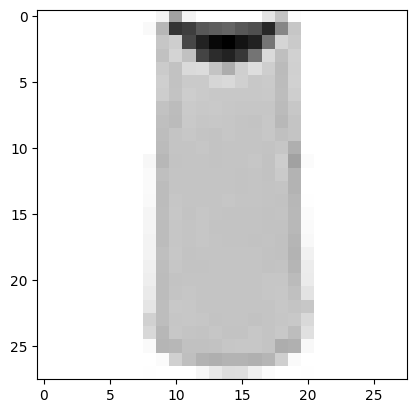

In [5]:
plt.imshow(X_train[2],cmap='Greys')

In [6]:
class_labels=['T_shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','Ankle boot']
'''
0=>T_shirt/top
1=>trouser
2=>pullover
3=>dress
4=>coat
5=>sandal
6=>shirt
7=>sneaker
8=>bag
9=>Ankle boot   '''

'\n0=>T_shirt/top\n1=>trouser\n2=>pullover\n3=>dress\n4=>coat\n5=>sandal\n6=>shirt\n7=>sneaker\n8=>bag\n9=>Ankle boot   '

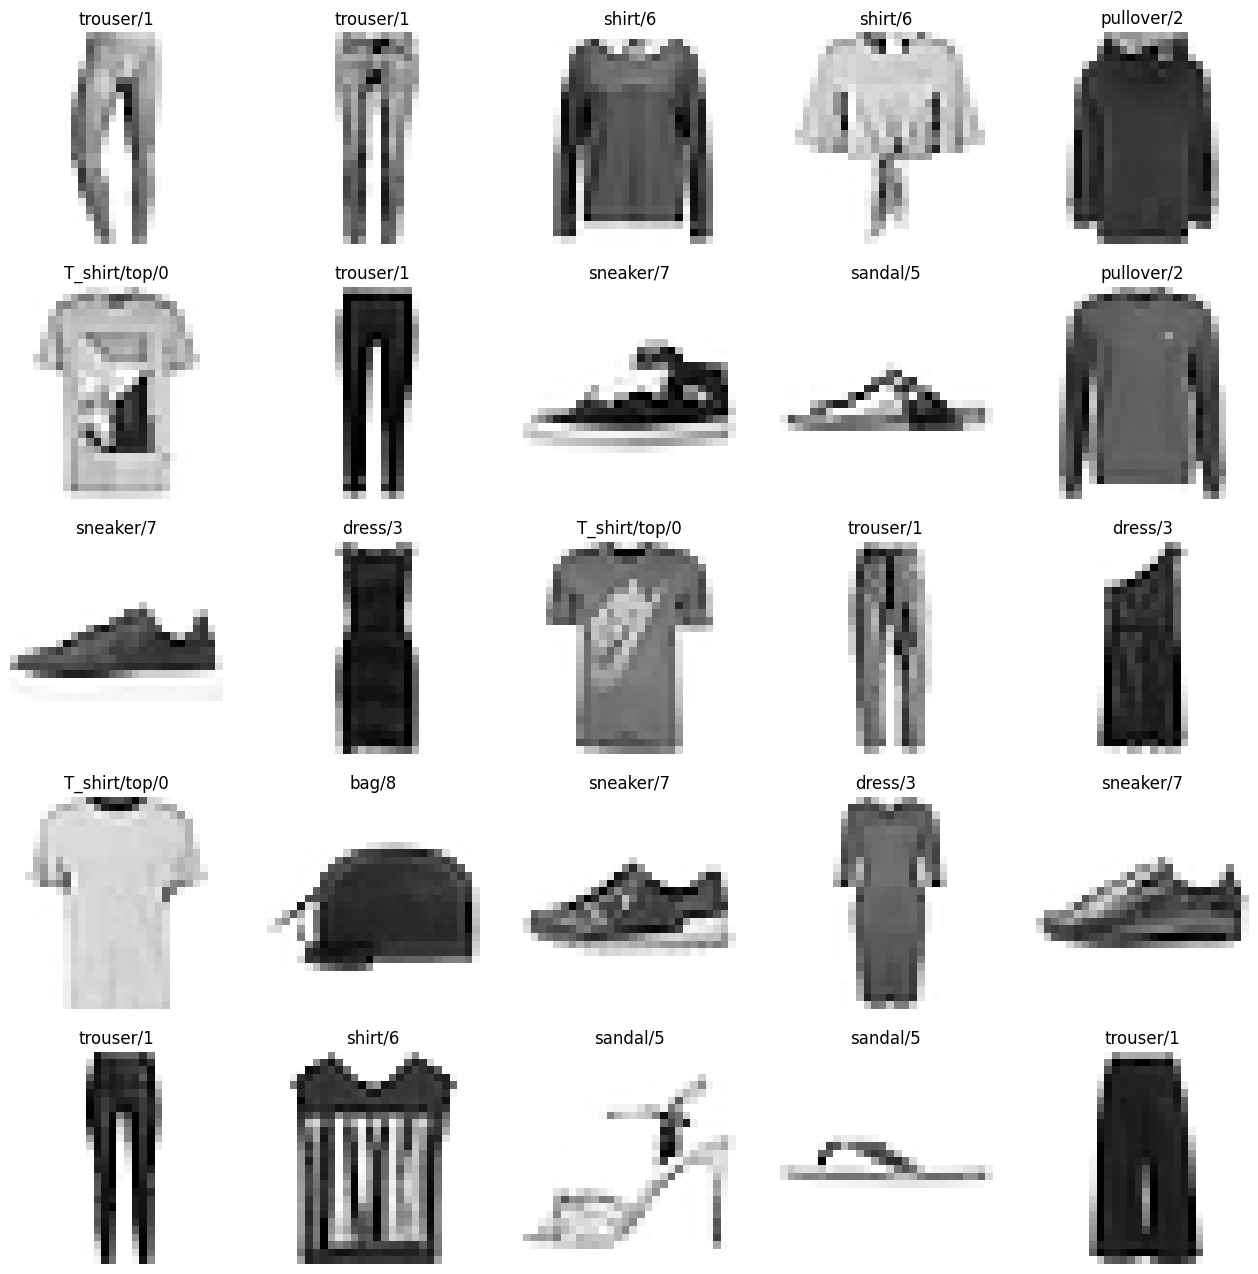

In [7]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))




---
## change the dimensions


In [8]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

## Feature scaling

In [10]:
X_train=X_train/255
X_test=X_test/255

## Split dataset

In [11]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=290)

In [12]:
X_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [13]:
X_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

## CNN Model Building

In [14]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
94/94 [==============================] - 45s 468ms/step - loss: 0.6384 - accuracy: 0.7849 - val_loss: 0.4318 - val_accuracy: 0.8478
Epoch 2/10
94/94 [==============================] - 23s 246ms/step - loss: 0.3932 - accuracy: 0.8615 - val_loss: 0.3734 - val_accuracy: 0.8708
Epoch 3/10
94/94 [==============================] - 24s 260ms/step - loss: 0.3390 - accuracy: 0.8817 - val_loss: 0.3470 - val_accuracy: 0.8767
Epoch 4/10
94/94 [==============================] - 26s 276ms/step - loss: 0.3068 - accuracy: 0.8917 - val_loss: 0.3218 - val_accuracy: 0.8860
Epoch 5/10
94/94 [==============================] - 26s 273ms/step - loss: 0.2838 - accuracy: 0.9000 - val_loss: 0.2982 - val_accuracy: 0.8953
Epoch 6/10
94/94 [==============================] - 27s 286ms/step - loss: 0.2667 - accuracy: 0.9057 - val_loss: 0.2897 - val_accuracy: 0.8941
Epoch 7/10
94/94 [==============================] - 25s 266ms/step - loss: 0.2514 - accuracy: 0.9096 - val_loss: 0.2837 - val_accuracy: 0.8979

## Test the model

In [18]:
model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

1/1 [==============================] - 0s 97ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.97]],
      dtype=float32)

In [19]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

1/1 [==============================] - 0s 20ms/step


9

In [20]:
y_test[0]

9

In [21]:
y_pred=model.predict(X_test).round(2)

313/313 [==============================] - 2s 6ms/step


In [22]:
y_pred

array([[0.  , 0.  , 0.  , ..., 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.31, 0.01, 0.01]], dtype=float32)

## Visualize output

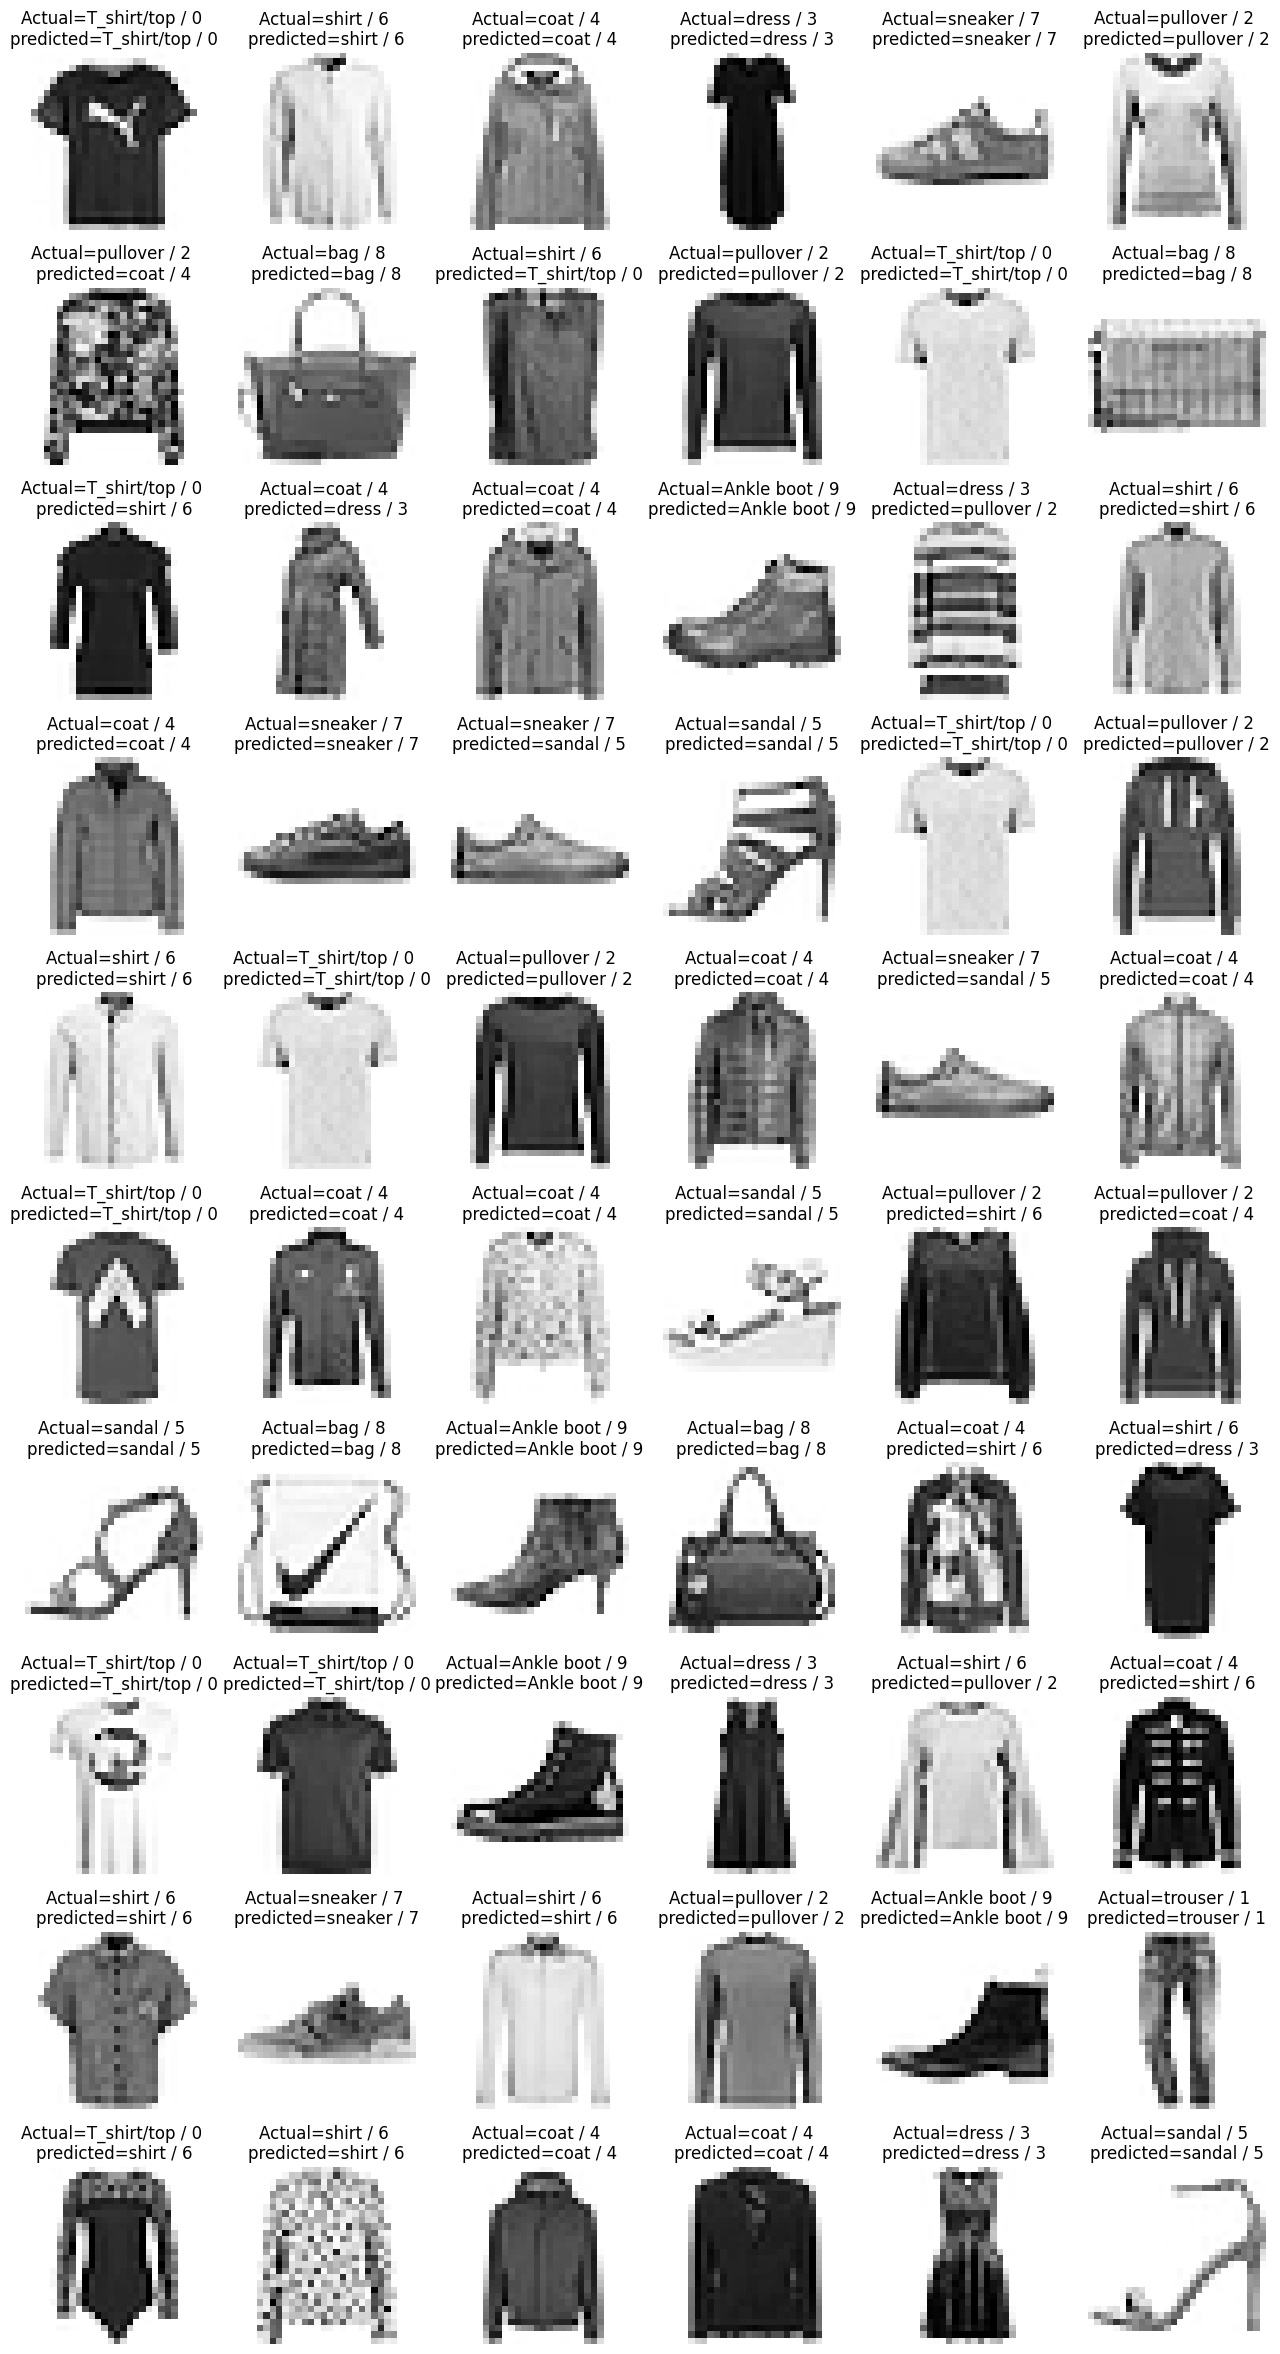

In [23]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={} / {} \npredicted={} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

## Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

<Axes: >

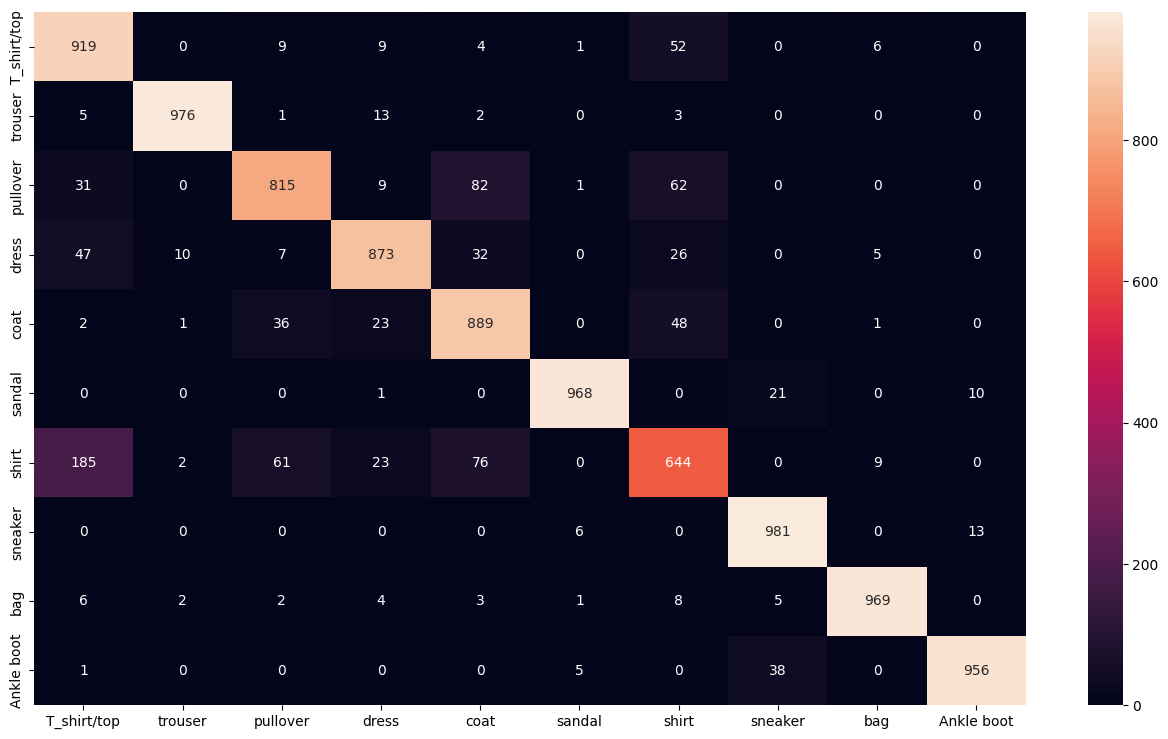

In [30]:
plt.figure(figsize=(16,9))
y_pred_labels=[np.argmax(label) for label in y_pred]
cm=confusion_matrix(y_test,y_pred_labels)
# show confusion matrix
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

In [32]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)

              precision    recall  f1-score   support

 T_shirt/top       0.77      0.92      0.84      1000
     trouser       0.98      0.98      0.98      1000
    pullover       0.88      0.81      0.84      1000
       dress       0.91      0.87      0.89      1000
        coat       0.82      0.89      0.85      1000
      sandal       0.99      0.97      0.98      1000
       shirt       0.76      0.64      0.70      1000
     sneaker       0.94      0.98      0.96      1000
         bag       0.98      0.97      0.97      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



## save model

In [35]:
model.save('fashion_classification_CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
